In [1]:
###########################################
%matplotlib inline
import sys
sys.path.append("../")
import pandas as pd
import numpy as np
### %pip install swigibp pandas etc..
###########################################
%pwd

'/home/david/projectos/voltrad1/notebooks'

In [2]:
import persist.sqlite_methods as pp

df= pp.get_yahoo_option_dataframe("SPY", "2019-12", "", "")
df.columns
df[df["Strike"]==206]
subset_df=df.iloc[(df['Strike'] - df['Underlying_Price']).abs().argsort()[:4]]
subset_df

,Quote_Time,Strike,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,...,IV,Root,IsNonstandard,Underlying,Underlying_Price,Last_Trade_Date,JSON,Quote_Time_txt,Last_Trade_Date_txt,Expiry_txt
891166,2019-09-12 19:10:11,302.0,call,SPY191220C00302000,8.82,8.81,8.89,0.79,9.838107,1538.0,...,0.140939,SPY,0,SPY,302.0,2019-09-12 18:35:33,,2019-09-12 19:10:11,2019-09-12 18:35:33,2019-12-20 00:00:00
565897,2019-04-29 16:10:07,294.0,call,SPY191220C00294000,13.42,13.40,13.49,1.09,8.840228,43.0,...,0.143014,SPY,0,SPY,294.0,2019-04-29 14:33:53,,2019-04-29 16:10:07,2019-04-29 14:33:53,2019-12-20 00:00:00
552193,2019-04-22 19:10:10,290.0,call,SPY191220C00290000,13.92,13.79,13.87,0.03,0.215981,131.0,...,0.146920,SPY,0,SPY,290.0,2019-04-22 15:55:38,,2019-04-22 19:10:10,2019-04-22 15:55:38,2019-12-20 00:00:00
891402,2019-09-12 19:10:11,302.0,call,SPY191231C00302000,9.07,9.12,9.19,0.88,10.744813,23.0,...,0.138284,SPY,0,SPY,302.0,2019-09-12 18:06:06,,2019-09-12 19:10:11,2019-09-12 18:06:06,2019-12-31 00:00:00


In [3]:
df.shape

(1248269, 21)

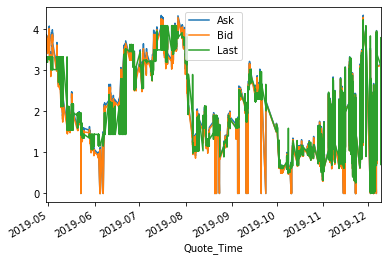

In [4]:
df2 = df[(df.Strike == 314.0) & (df.Type == "call")]
x_col = 'Quote_Time'
y_cols = ['Ask','Bid','Last']
df2=df2.loc[:,[x_col] + y_cols].dropna()
df2.loc[:,y_cols] \
    = df2.loc[:,y_cols].apply(pd.to_numeric, errors='coerce')
df2.loc[:,x_col]=pd.to_datetime(df2.loc[:,x_col], format="%Y-%m-%d %H:%M:%S")
df2.index = df2[x_col]
del df2[x_col]
df2.plot()

In [ ]:

##%pip install swigibpy

In [11]:
import pandas_datareader.data as web
symbol="SPY"
source1="yahoo"

option=web.YahooOptions(symbol, session=None)

all_data = option.get_call_data()
all_data

#pd = web.DataReader(
#name=symbol,
#data_source=source1,
#start=None,
#end=None,
#retry_count=3,
#pause=0.1,
#session=None
#)
#pd

,,,,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
Strike,Expiry,Type,Symbol,,,,,,,,,,,,,,,
265.0,2019-12-27,call,SPY191227C00265000,47.69,58.31,58.50,0.0,0.0,4.0,0.0,1.546877,SPY,False,SPY,323.35,2019-12-27 16:38:11,2019-12-02 19:36:57,"{'contractSymbol': 'SPY191227C00265000', 'stri..."
270.0,2019-12-27,call,SPY191227C00270000,42.73,53.24,53.47,0.0,0.0,NaN,0.0,1.125004,SPY,False,SPY,323.35,2019-12-27 16:38:11,2019-12-02 19:35:32,"{'contractSymbol': 'SPY191227C00270000', 'stri..."
275.0,2019-12-27,call,SPY191227C00275000,37.78,48.27,48.47,0.0,0.0,NaN,0.0,1.156254,SPY,False,SPY,323.35,2019-12-27 16:38:11,2019-12-02 19:29:44,"{'contractSymbol': 'SPY191227C00275000', 'stri..."
280.0,2019-12-27,call,SPY191227C00280000,29.91,40.70,40.84,0.0,0.0,NaN,1.0,0.000010,SPY,False,SPY,323.35,2019-12-27 16:38:11,2019-11-18 05:14:16,"{'contractSymbol': 'SPY191227C00280000', 'stri..."
283.0,2019-12-27,call,SPY191227C00283000,29.86,40.24,40.45,0.0,0.0,2.0,0.0,1.175785,SPY,False,SPY,323.35,2019-12-27 16:38:11,2019-12-02 19:27:31,"{'contractSymbol': 'SPY191227C00283000', 'stri..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336.0,2019-12-27,call,SPY191227C00336000,0.02,0.00,0.00,0.0,0.0,12.0,62.0,0.125009,SPY,False,SPY,323.35,2019-12-27 16:38:11,2019-12-17 15:40:44,"{'contractSymbol': 'SPY191227C00336000', 'stri..."
340.0,2019-12-27,call,SPY191227C00340000,0.01,0.00,0.01,0.0,0.0,16.0,30.0,0.375006,SPY,False,SPY,323.35,2019-12-27 16:38:11,2019-12-12 20:43:41,"{'contractSymbol': 'SPY191227C00340000', 'stri..."
342.5,2019-12-27,call,SPY191227C00342500,0.01,0.00,0.01,0.0,0.0,8.0,113.0,0.421881,SPY,False,SPY,323.35,2019-12-27 16:38:11,2019-12-16 14:37:52,"{'contractSymbol': 'SPY191227C00342500', 'stri..."
